In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = Path("cleaned_data.csv")
cleaned_df = pd.read_csv(csv_path)

cleaned_df.head()

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
0,2020,AK,Kenai Peninsula,Cardiovascular Diseases,Heart Disease Mortality,165.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Hispanic,60.193263,-150.280744
1,2020,AL,Walker County,Cardiovascular Diseases,Heart Disease Mortality,109.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Hispanic,33.810226,-87.297070
2,2020,AL,St. Clair County,Cardiovascular Diseases,Heart Disease Mortality,90.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,33.716065,-86.314960
3,2020,FL,Polk County,Cardiovascular Diseases,Heart Disease Mortality,180.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Hispanic,27.946050,-81.699391
4,2020,GA,Forsyth County,Cardiovascular Diseases,Heart Disease Mortality,133.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,34.228391,-84.124685


In [4]:
gender_df = pd.DataFrame(cleaned_df.loc[(cleaned_df["Gender"])!= "Overall"])
gender_df.head()

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
0,2020,AK,Kenai Peninsula,Cardiovascular Diseases,Heart Disease Mortality,165.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Hispanic,60.193263,-150.280744
3,2020,FL,Polk County,Cardiovascular Diseases,Heart Disease Mortality,180.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Hispanic,27.946050,-81.699391
5,2020,GA,DeKalb County,Cardiovascular Diseases,Heart Disease Mortality,368.4,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,More than one race,33.772054,-84.220678
6,2020,IL,McHenry County,Cardiovascular Diseases,Heart Disease Mortality,217.4,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Hispanic,42.323803,-88.453961
7,2020,IL,DuPage County,Cardiovascular Diseases,Heart Disease Mortality,149.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,More than one race,41.855678,-88.092181


In [5]:
states = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "IA",
    "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO",
    "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK",
    "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI",
    "WV", "WY", "DC"]

state_west = ["CA", "OR", "WA", "NV", "ID", "UT", "CO", "WY", "MT"]
state_midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
state_southwest = ["AZ", "NM", "TX", "OK"]
state_southeast = ["AR", "LA", "MS", "TN", "AL", "KY", "GA", "WV", "VA", "NC", "SC", "FL", "MD", "DE"]
state_northeast = ["CT", "DC", "HI", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
state_noncontig = ["HI", "AK"]

In [6]:
#for state in states:

In [7]:
#find gender mean
mean = gender_df['Death_Rate(per M)'].groupby(gender_df['Gender']).mean()
summary_stat = pd.DataFrame({ "Mean":mean,  }) 
summary_stat

,Mean
Gender,
Female,274.953650
Male,443.921232


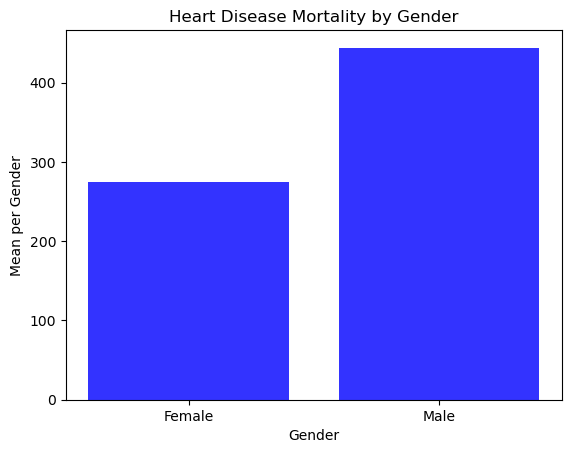

In [19]:
#Plot Gender
x_axis = mean.index.values
y_axis = mean.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.title("Heart Disease Mortality by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean per Gender")
plt.xticks(rotation="horizontal")
plt.savefig('Outputs/gender.png')
plt.show()

In [9]:
#Minnesota Data Only
MN_df = pd.DataFrame(gender_df.loc[(gender_df["State"])== "MN"])
MN_df.head()

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
11,2020,MN,Goodhue County,Cardiovascular Diseases,Heart Disease Mortality,238.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Black,44.410900,-92.723112
12,2020,MN,Ramsey County,Cardiovascular Diseases,Heart Disease Mortality,687.7,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,More than one race,45.023030,-93.099403
8047,2020,MN,Dodge County,Cardiovascular Diseases,Heart Disease Mortality,355.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,White,44.021518,-92.866343
8055,2020,MN,Yellow Medicine County,Cardiovascular Diseases,Heart Disease Mortality,197.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Overall,44.715905,-95.871339
8061,2020,MN,Mower County,Cardiovascular Diseases,Heart Disease Mortality,384.7,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Overall,43.670765,-92.755885


In [10]:
#Find Gender Mean for MN
MNmean = MN_df['Death_Rate(per M)'].groupby(MN_df['Gender']).mean()
state_sum_stat = pd.DataFrame({ "Mean": MNmean }) 
state_sum_stat

,Mean
Gender,
Female,194.596759
Male,331.185169


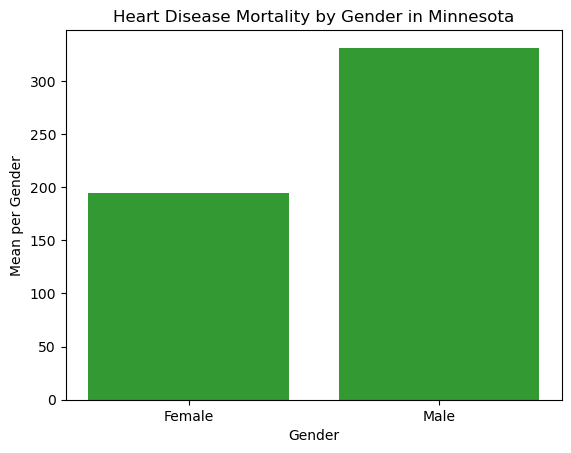

In [20]:
#Plot MN Gender data
x_axis = MNmean.index.values
y_axis = MNmean.values

plt.bar(x_axis, y_axis, color='g', alpha=0.8, align='center')

plt.title("Heart Disease Mortality by Gender in Minnesota")
plt.xlabel("Gender")
plt.ylabel("Mean per Gender")
plt.xticks(rotation="horizontal")
plt.savefig('Outputs/MNgender.png')
plt.show()

In [12]:
#gender total population
total = gender_df['Death_Rate(per M)'].sum()
total

7671290.9

In [13]:
expected_total = total/2
expected_total

3835645.45

In [14]:
population = gender_df['Death_Rate(per M)'].groupby(gender_df['Gender']).sum()
pop_stat = pd.DataFrame({ "Observed":population, "Expected":3835645.45 }) 
pop_stat

,Observed,Expected
Gender,,
Female,2828998.1,3835645.45
Male,4842292.8,3835645.45


In [15]:
#chi-square 5%
#null hypothsis: there is no correlation between gender and heart disease

crit_value = stats.chi2.ppf(q=0.95, df=1)
crit_value



3.841458820694124

In [16]:
stats.chisquare(pop_stat['Observed'],pop_stat['Expected'])

Power_divergenceResult(statistic=528379.8518249502, pvalue=0.0)

In [17]:
#Conclusion 
#Since the chi square value of +52000 exceeds the critical value of 3.84, we conclude that the results are statistically significant.
#We can conclude the null hypothsis is false